## Import Libraries

In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn

## Creating data

In [2]:
# Creating a tensor 
X = torch.linspace(1,50, 50).reshape(-1,1)

print(X.dtype)
print(type(X))
print(X.shape)
X

torch.float32
<class 'torch.Tensor'>
torch.Size([50, 1])


tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [3]:
# Adding noise for function
noise = torch.randint(-10,10,(50,1), dtype = torch.float)
noise

tensor([[  3.],
        [  1.],
        [ -2.],
        [ -3.],
        [ -4.],
        [ -2.],
        [-10.],
        [  9.],
        [ -5.],
        [  4.],
        [  3.],
        [  1.],
        [ -9.],
        [ -3.],
        [ -4.],
        [ -6.],
        [ -3.],
        [ -5.],
        [  7.],
        [ -7.],
        [  1.],
        [ -4.],
        [  2.],
        [ -9.],
        [ -4.],
        [-10.],
        [ -6.],
        [ -8.],
        [  7.],
        [ -5.],
        [  2.],
        [  1.],
        [  8.],
        [  7.],
        [  0.],
        [ -9.],
        [  3.],
        [ -3.],
        [ -1.],
        [ -4.],
        [ -4.],
        [ -9.],
        [ -1.],
        [ -6.],
        [ -2.],
        [ -3.],
        [ -1.],
        [  0.],
        [  0.],
        [ -3.]])

In [4]:
# Function 

y = 2*X + 1 + noise

print(y.dtype)
print(type(y))
print(y.shape)
y

torch.float32
<class 'torch.Tensor'>
torch.Size([50, 1])


tensor([[ 6.],
        [ 6.],
        [ 5.],
        [ 6.],
        [ 7.],
        [11.],
        [ 5.],
        [26.],
        [14.],
        [25.],
        [26.],
        [26.],
        [18.],
        [26.],
        [27.],
        [27.],
        [32.],
        [32.],
        [46.],
        [34.],
        [44.],
        [41.],
        [49.],
        [40.],
        [47.],
        [43.],
        [49.],
        [49.],
        [66.],
        [56.],
        [65.],
        [66.],
        [75.],
        [76.],
        [71.],
        [64.],
        [78.],
        [74.],
        [78.],
        [77.],
        [79.],
        [76.],
        [86.],
        [83.],
        [89.],
        [90.],
        [94.],
        [97.],
        [99.],
        [98.]])

torch.float32
float32
torch.float32
float32


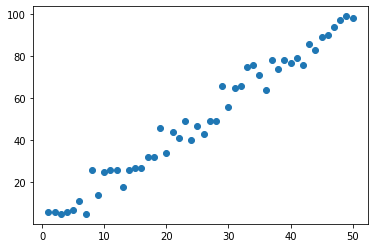

In [5]:
# plt does not plot tensor, then we must conver to numpy array
X_arr = X.numpy()
y_arr = y.numpy()

print(X.dtype)
print(X_arr.dtype)
print(y.dtype)
print(y_arr.dtype)
plt.scatter(X_arr, y_arr);

## Creating Model

In [6]:
# Defining the model
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):

    y_pred = self.linear(x)
    return y_pred 


In [7]:
# Defining Criterion
criterion = nn.MSELoss()
learn_rate = 0.001
model = Model(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate)

In [8]:
epochs = 50 
losses = []

for epoch in range(epochs):

  epoch = epoch+1

  # Predict on forward pass
  y_pred = model.forward(X)

  # Calculate the Loss 
  loss = criterion(y_pred,y)

  # Record That Error
  losses.append(loss)

  # Check progress 
  print("Epoch:{} Loss:{} Weight:{} Bias:{}".format(epoch,loss.item(),model.linear.weight.item(),model.linear.bias.item()))
  
  optimizer.zero_grad()

  # Backpropagatiton
  loss.backward()

  # update the hyperparameters
  optimizer.step()

Epoch:1 Loss:4903.45361328125 Weight:-0.39299750328063965 Bias:-0.7468934059143066
Epoch:2 Loss:2542.560791015625 Weight:3.7008705139160156 Bias:-0.6251967549324036
Epoch:3 Loss:1323.7171630859375 Weight:0.7593608498573303 Bias:-0.7125307321548462
Epoch:4 Loss:694.4721069335938 Weight:2.872877597808838 Bias:-0.6496730446815491
Epoch:5 Loss:369.614990234375 Weight:1.3542801141738892 Bias:-0.6947304606437683
Epoch:6 Loss:201.9029541015625 Weight:2.4454123973846436 Bias:-0.6622492671012878
Epoch:7 Loss:115.31924438476562 Weight:1.6614139080047607 Bias:-0.6854807734489441
Epoch:8 Loss:70.61914825439453 Weight:2.2247257232666016 Bias:-0.6686819195747375
Epoch:9 Loss:47.542091369628906 Weight:1.8199743032455444 Bias:-0.6806455850601196
Epoch:10 Loss:35.62822341918945 Weight:2.1107914447784424 Bias:-0.6719430088996887
Epoch:11 Loss:29.477506637573242 Weight:1.9018316268920898 Bias:-0.6780894994735718
Epoch:12 Loss:26.302099227905273 Weight:2.051969289779663 Bias:-0.6735667586326599
Epoch:13 L

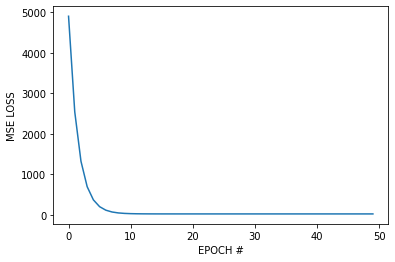

In [9]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE LOSS')
plt.xlabel('EPOCH #');

In [10]:
x = X_arr

current_weight = model.linear.weight.item() 
current_bias = model.linear.bias.item()

pred_y = current_weight*x + current_bias

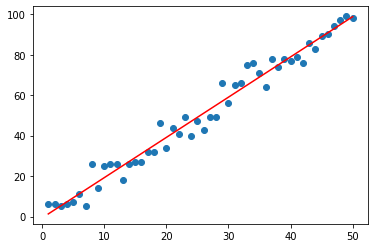

In [11]:
plt.scatter(X_arr, y_arr)
plt.plot(x, pred_y, 'r')